<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/02-Machine-Learning/notebooks/04-Polinomial-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Polinomial

## Ejemplo 1

In [ ]:
import numpy as np

rng = np.random.RandomState(4595)
size = 100

b0 = 2
b1 = -1
b2 = 1

x = 3 * rng.rand(size)
y = (b0 + (b1*x) + (b2*x**2)) + rng.randn(size) # Agregamos ruido con distribución normal

In [ ]:
x = x.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split

x, x_test, y, y_test = train_test_split(x,y,train_size=0.8,random_state=2287)

In [ ]:
x_test

array([[0.6029392 ],
       [2.0398809 ],
       [1.60366462],
       [1.88048471],
       [1.80345539],
       [1.19693697],
       [2.88198815],
       [2.36929111],
       [2.86179732],
       [1.84000595],
       [1.3050184 ],
       [1.00627444],
       [0.46658403],
       [2.67407367],
       [2.50154641],
       [2.71271576],
       [1.6598993 ],
       [0.64270479],
       [1.27389721],
       [1.46417715]])

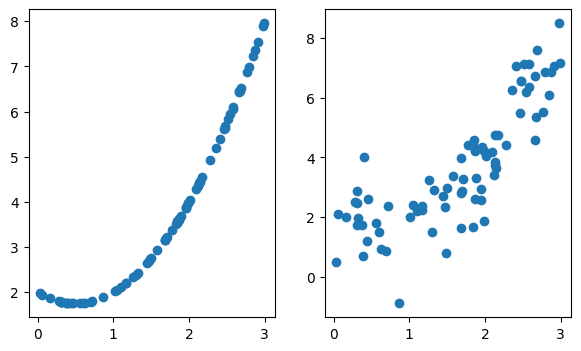

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.subplot(1,2,1)
plt.scatter(x,b0 + (b1*x) + (b2*x**2))
plt.subplot(1,2,2)
plt.scatter(x,y)
plt.show()

Para crear la nueva feature $x^2$ usaremos la clase [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

Esta clase genera una nueva matriz de características (*features*) consistente en todas las combinaciones polinómicas de las caractéristicas de grado menor o igual al grado especificado. 

Por ejemplo, si una muestra de entrada es bidimensional con la forma 

$$[a, b]$$

las características polinómicas (*polynomial features*) de grado 2 son 

$$[1, a, b, a^2, ab, b^2].$$

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

pfeats = PolynomialFeatures(degree=2, include_bias=False)
# pfeats = PolynomialFeatures(degree=2, include_bias=True)
new_x = pfeats.fit_transform(x)

Observar que le indicamos al constructor de la clase que no incluya el `bias` (la columna de 1s al principio de la nueva matriz de caracteristicas). Esto se hace porque pasaremos esta matriz a la regresión lineal, la cuál le agregará dicha columna.

La variable independiente era:

In [ ]:
print(x[:5])

[[1.99185541]
 [0.05811746]
 [0.40667043]
 [1.95451352]
 [2.47314768]]


Las nuevas variables independientes son:

In [ ]:
print(new_x[:5])

[[1.99185541e+00 3.96748798e+00]
 [5.81174589e-02 3.37763902e-03]
 [4.06670426e-01 1.65380836e-01]
 [1.95451352e+00 3.82012310e+00]
 [2.47314768e+00 6.11645946e+00]]


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(new_x,y)

LinearRegression()

In [ ]:
lr.score(new_x,y)

0.7886608902823524

In [ ]:
lr.intercept_,lr.coef_

(2.062498746137912, array([-1.15413317,  1.03549476]))

In [ ]:
b0 = lr.intercept_
b1 = lr.coef_[0]
b2 = lr.coef_[1]

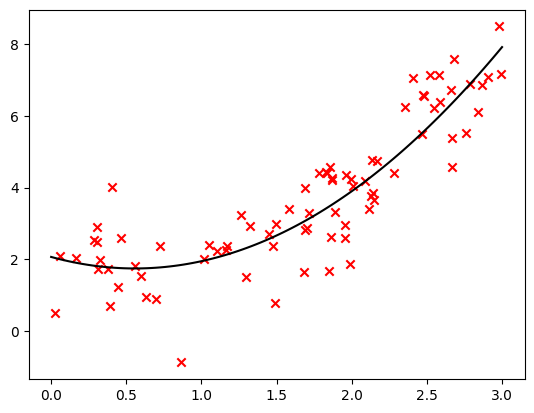

In [ ]:
x_values = np.linspace(0, 3, 100)

y_hat = b0 + b1*x_values + b2*x_values**2 
plt.figure()
plt.scatter(x, y, marker='x',color='red')
plt.plot(x_values, y_hat, color='black')
plt.show()

⭕ Ahora evaluemos en el conjunto de prueba

In [ ]:
x_test=pfeats.transform(x_test)
lr.score(x_test,y_test)

0.8450340566329249

### Pipelines
sklearn pipelin

In [ ]:
#sucesion de estimadores(fit,transform)
import numpy as np

rng = np.random.RandomState(4595)
size = 100

b0 = 2
b1 = -1
b2 = 1

x = 3 * rng.rand(size)
y = (b0 + (b1*x) + (b2*x**2)) + rng.randn(size) # Agregamos ruido con distribución normal
x = x.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split

x, x_test, y, y_test = train_test_split(x,y,train_size=0.8,random_state=2287)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
"""
pl = Pipeline([('scl',StandardScaler()),
    ('pf',PolynomialFeatures(degree=2,include_bias=False)),
               ('lr',LinearRegression())])
               """
pl = Pipeline([
    ('pf',PolynomialFeatures(degree=2,include_bias=False)),
               ('lr',LinearRegression())])               

In [ ]:
pl.fit(x,y)

Pipeline(steps=[('pf', PolynomialFeatures(include_bias=False)),
                ('lr', LinearRegression())])

Podemos evaluar directamente el score

In [ ]:
pl.score(x,y)

0.7886608902823524

In [ ]:
#pl['lr'].intercept_ #regresion lineal intercepto
pl['lr'].coef_ #regresion lineal coeficientes

array([-1.15413317,  1.03549476])

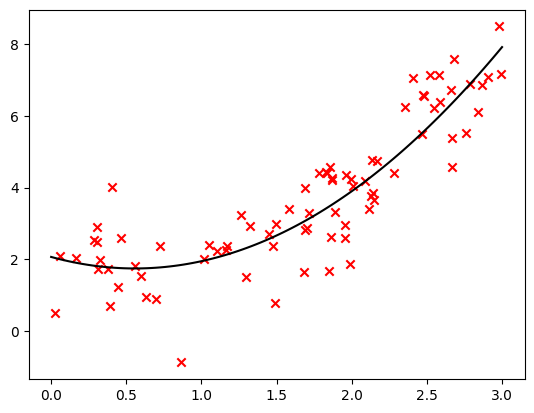

In [ ]:
x_values = np.linspace(0, 3, 100)

b0 = pl['lr'].intercept_
b1 = pl['lr'].coef_[0]
b2 = pl['lr'].coef_[1]

y_hat = b0 + b1*x_values + b2*x_values**2 
plt.figure()
plt.scatter(x, y, marker='x',color='red')
plt.plot(x_values, y_hat, color='black')
plt.show()

Veamos las predicciones en el conjunto de prueba

In [ ]:
y_pred = pl.predict(x)

Comparemos las predicciones y los valores reales

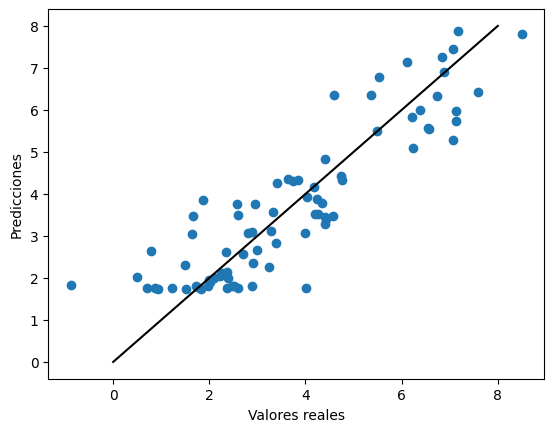

In [ ]:
plt.figure()
plt.scatter(y,y_pred,label='Valores predichos')
plt.ylabel("Predicciones")
plt.xlabel("Valores reales")
plt.plot(np.linspace(0,8,100),np.linspace(0,8,100),color='black')
plt.show()

In [ ]:
y_pred = pl.predict(x_test)

In [ ]:
pl.score(x_test,y_test)

0.8450340566329249

## Ejemplo 2: Práctica

Usaremos el siguiente dataset de datos de peces. Hay un total de 159 filas (muestras de entrenamiento) y 7 columnas en el conjunto de datos. 

Los detalles de cada columna son los siguientes

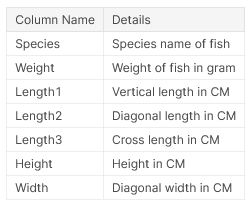

* Las variables independientes son "Especie", "Longitud1", "Longitud2", "Longitud3", "Altura" y "Anchura".
* La variable dependiente es "Peso".

Tenemos que estimar el peso del pez basándonos en sus valores de medición.

## Importamos las librerias requeridas para la práctica.


In [ ]:
# Data manipulation libraries
import numpy as np
import pandas as pd 


# Data visualization 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl




In [ ]:
#import pandas as pd

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/02-Machine-Learning/data/fishes.csv'
df = pd.read_csv(url)
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


⭕ Práctica

Construye un modelo de Regresión Lineal (Polinomial) para predecir el peso de un pez en función de las variables predictoras.

**Preprocesamiento**

* Cambia el nombre de las columnas por nombres relacionados con su interpretación.
* Verifica si hay valores faltantes
* Verifica la correlación entre variables usando el método [corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) del dataframe. Considera eliminar las variables con correlación para evitar la colinearidad.
* Verifica si hay datos faltantes o invalidos.
* Explora la relación entre pares de variables usando [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) de seaborn.
* Considera usar PolinomialFeatures en función de tus observaciones del punto anterior.
* Considera la codificación one-hot para la(s) variable(s) categórica(s).

**Regresión Lineal**
Entrena un modelo de RL separando una parte para entrenamiento y reporta la métrica de rendimiento r2score y [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html).

Considera varios modelos para mejorar tus métricas.